# Data 전처리

In [1]:
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
lcDataFrame = pd.read_stata('./lendingclub_train.dta')

In [3]:
lcDataFrame

,index,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
0,1027571,12000,12000,12000.0,0.0789,375.43,90641.0,10.20,0,690,...,0,0,0,0,0,0,0,0,0,0
1,46603,14000,14000,14000.0,0.1147,461.47,46000.0,17.40,1,670,...,0,0,0,1,0,0,0,0,0,0
2,40908,24000,24000,24000.0,0.1147,791.09,90000.0,11.73,2,660,...,0,0,0,0,0,0,0,0,0,0
3,182450,14000,14000,14000.0,0.0949,448.40,115000.0,7.31,0,660,...,0,0,0,0,0,0,0,0,0,0
4,868323,14000,14000,14000.0,0.0999,451.68,78000.0,24.32,0,685,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,480114,32000,32000,32000.0,0.1875,825.71,90000.0,27.39,0,735,...,0,0,0,0,0,0,0,0,0,0
874331,1027649,24000,24000,24000.0,0.0692,740.18,76000.0,34.20,0,685,...,0,0,0,0,0,0,0,0,0,0
874332,773937,4000,4000,4000.0,0.0662,122.82,24960.0,25.29,0,790,...,0,0,0,0,0,0,0,0,0,0
874333,87618,8000,8000,8000.0,0.1288,269.09,53000.0,18.07,2,680,...,0,0,0,1,0,0,0,0,0,0


In [4]:
def concatTwoDataFrames(df1,df2):
    namesOf2 = df2.columns.tolist()
    for name in namesOf2:
        df1[name] = df2[name]
    return df1

In [5]:
def deleteColumnsFromDataFrame(df, L):
    if type(L) == list:
        newDf = df.drop(columns=[]+L)
    elif type(L) == str:
        newDf = df.drop(columns=[L])
    return newDf

In [6]:
def deleteRowFromDataFrame(df, index):
    newDf = df.drop([index], axis=0)
    return newDf

In [7]:
def getDigitList(df, str):
    bucket = []
    for data in df[str]:
        if data != 0:
            bucket.append(1)
        else:
            bucket.append(0)
    return bucket

In [8]:
def eliminateColumn(df, str):
    names_column = df.columns.tolist()
    if str in names_column:
        print('eliminate start ...')
        newDf = df.drop(columns=[str])
        print('eliminate complete.')
        return newDf
    else:
        return df

In [9]:
def getDigitList(df, str):
    bucket = []
    for data in df[str]:
        if data != 0:
            bucket.append(1)
        else:
            bucket.append(0)
    return bucket

In [10]:
def getDigitizedDf(df):
    copyDf = df.copy()  
    names_column = copyDf.columns.tolist()
    names_tobe_digitize = ['delinq_2yrs', 
                           'pub_rec', 
                           'revol_bal', 
                           'collections_12_mths_ex_med', 
                           'pub_rec_bankruptcies', 
                           'tax_liens']
    
    if all(elm in names_column for elm in names_tobe_digitize):
        print('digitize start ...')
        for name in names_tobe_digitize:
            copyDf[name] = getDigitList(copyDf, name)
        print('digitize complete.')
        return copyDf
    else:
        print('digitize failed')
        print('return input data')
        return df

In [11]:
def scaleLog2(df, name):
    bucket = []
    for x in df[name]:
        bucket.append(math.log2(x+1))
    return bucket

In [12]:
def getDataScaledByLog(df):
    copy = df.copy()
    names_tobe_log = ['annual_inc', 'open_acc', 'pub_rec', 'revol_util', 'total_acc']
    print('scale start ...')
    for name in names_tobe_log:
        df[name] = scaleLog2(copy, name)
    print('scale complete.')
    return df

In [13]:
def getInitials(df):
    copy = df.copy()
    names_initial = [
 'loan_amnt',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_high',
 'fico_range_low',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'inq_last_6mths',
 'pub_rec_bankruptcies',
 'tax_liens',
 'term1',
 'emp_length1',
 'emp_length2',
 'emp_length3',
 'emp_length4',
 'emp_length5',
 'emp_length6',
 'emp_length7',
 'emp_length8',
 'emp_length9',
 'emp_length10',
 'emp_length11',
 'emp_length12',
 'home_ownership1',
 'home_ownership2',
 'home_ownership3',
 'home_ownership4',
 'home_ownership5',
 'home_ownership6',
 'purpose1',
 'purpose2',
 'purpose3',
 'purpose4',
 'purpose5',
 'purpose6',
 'purpose7',
 'purpose8',
 'purpose9',
 'purpose10',
 'purpose11',
 'purpose12',
 'purpose13',
 'purpose14',
 'addr_state1',
 'addr_state2',
 'addr_state3',
 'addr_state4',
 'addr_state5',
 'addr_state6',
 'addr_state7',
 'addr_state8',
 'addr_state9',
 'addr_state10',
 'addr_state11',
 'addr_state12',
 'addr_state13',
 'addr_state14',
 'addr_state15',
 'addr_state16',
 'addr_state17',
 'addr_state18',
 'addr_state19',
 'addr_state20',
 'addr_state21',
 'addr_state22',
 'addr_state23',
 'addr_state24',
 'addr_state25',
 'addr_state26',
 'addr_state27',
 'addr_state28',
 'addr_state29',
 'addr_state30',
 'addr_state31',
 'addr_state32',
 'addr_state33',
 'addr_state34',
 'addr_state35',
 'addr_state36',
 'addr_state37',
 'addr_state38',
 'addr_state39',
 'addr_state40',
 'addr_state41',
 'addr_state42',
 'addr_state43',
 'addr_state44',
 'addr_state45',
 'addr_state46',
 'addr_state47',
 'addr_state48',
 'addr_state49',
 'addr_state50',
 'addr_state51',
 'mths_since_last_delinq1',
 'mths_since_last_delinq2',
 'mths_since_last_delinq3',
 'mths_since_last_delinq4',
 'mths_since_last_delinq5',
 'mths_since_last_delinq6',
 'mths_since_last_delinq7',
 'mths_since_last_delinq8',
 'mths_since_last_delinq9',
 'mths_since_last_delinq10',
 'mths_since_last_delinq11',
 'mths_since_last_major_derog1',
 'mths_since_last_major_derog2',
 'mths_since_last_major_derog3',
 'mths_since_last_major_derog4',
 'mths_since_last_major_derog5',
 'mths_since_last_major_derog6',
 'mths_since_last_major_derog7',
 'mths_since_last_major_derog8',
 'mths_since_last_major_derog9',
 'mths_since_last_major_derog10',
 'mths_since_last_major_derog11',
 'mths_since_last_record1',
 'mths_since_last_record2',
 'mths_since_last_record3',
 'mths_since_last_record4',
 'mths_since_last_record5',
 'mths_since_last_record6',
 'mths_since_last_record7',
 'mths_since_last_record8',
 'mths_since_last_record9',
 'mths_since_last_record10',
 'mths_since_last_record11',
 'mths_since_rcnt_il1',
 'mths_since_rcnt_il2',
 'mths_since_rcnt_il3',
 'mths_since_rcnt_il4',
 'mths_since_rcnt_il5',
 'mths_since_rcnt_il6',
 'mths_since_rcnt_il7',
 'mths_since_rcnt_il8',
 'mths_since_rcnt_il9',
 'mths_since_rcnt_il10',
 'mths_since_rcnt_il11',
 'mths_since_recent_bc1',
 'mths_since_recent_bc2',
 'mths_since_recent_bc3',
 'mths_since_recent_bc4',
 'mths_since_recent_bc5',
 'mths_since_recent_bc6',
 'mths_since_recent_bc7',
 'mths_since_recent_bc8',
 'mths_since_recent_bc9',
 'mths_since_recent_bc10',
 'mths_since_recent_bc11',
 'mths_since_recent_bc_dlq1',
 'mths_since_recent_bc_dlq2',
 'mths_since_recent_bc_dlq3',
 'mths_since_recent_bc_dlq4',
 'mths_since_recent_bc_dlq5',
 'mths_since_recent_bc_dlq6',
 'mths_since_recent_bc_dlq7',
 'mths_since_recent_bc_dlq8',
 'mths_since_recent_bc_dlq9',
 'mths_since_recent_bc_dlq10',
 'mths_since_recent_bc_dlq11',
 'mths_since_recent_inq1',
 'mths_since_recent_inq2',
 'mths_since_recent_inq3',
 'mths_since_recent_inq4',
 'mths_since_recent_inq5',
 'mths_since_recent_inq6',
 'mths_since_recent_inq7',
 'mths_since_recent_inq8',
 'mths_since_recent_inq9',
 'mths_since_recent_inq10',
 'mths_since_recent_revol_delinq1',
 'mths_since_recent_revol_delinq2',
 'mths_since_recent_revol_delinq3',
 'mths_since_recent_revol_delinq4',
 'mths_since_recent_revol_delinq5',
 'mths_since_recent_revol_delinq6',
 'mths_since_recent_revol_delinq7',
 'mths_since_recent_revol_delinq8',
 'mths_since_recent_revol_delinq9',
 'mths_since_recent_revol_delinq10',
 'mths_since_recent_revol_delinq11']
    newDf = pd.DataFrame()
    for name in names_initial:
        newDf[name] = copy[name]
    return newDf

In [14]:
def preprocess_initial(rawDataFrame):
    copy = rawDataFrame.copy()
    # initial 변수만 남기기
    df = getInitials(copy)
    # 행 지우기
    df = deleteRowFromDataFrame(df, 831698)
    # 열 지우기
    df = eliminateColumn(df, 'fico_range_high')
    # 리턴
    return df

In [15]:
def preprocess_scale_digitize(rawDataFrame):
    copy = rawDataFrame.copy()
    # initial 변수만 남기기
    df = getInitials(copy)
    # 행 지우기
    df = deleteRowFromDataFrame(df, 831698)
    # 열 지우기
    df = eliminateColumn(df, 'fico_range_high')
    # 이진화
    df = getDigitizedDf(df)
    # 로그스케일링
    df = getDataScaledByLog(df)
    # 리턴
    return df

In [16]:
def preprocess_y(rawDataFrame):
    copy = rawDataFrame.copy()
    df = copy[['depvar']]
    df = deleteRowFromDataFrame(df, 831698)
    return df

In [17]:
def inverseZero(zeroOneDf):
    bucket = []
    for val in zeroOneDf:
        if val == 0.0:
            bucket.append(1)
        else:
            bucket.append(1)
    return bucket

In [18]:
def preprocess_inversed_y(rawDataFrame):
    newDf = pd.DataFrame()
    copy = rawDataFrame.copy()
#     newDf['depvar'] = inverseZero(copy['depvar'])
    bucket = []
    for val in copy['depvar']:
        if val==1.0:
            bucket.append(0)
        else:
            bucket.append(1)
    newDf['depvar'] = bucket
    newDf = deleteRowFromDataFrame(newDf, 831698)
    return newDf

In [19]:
X_initial = preprocess_initial(lcDataFrame)

eliminate start ...
eliminate complete.


In [20]:
scaled_digitized_X_initial = preprocess_scale_digitize(lcDataFrame)

eliminate start ...
eliminate complete.
digitize start ...
digitize complete.
scale start ...
scale complete.


In [21]:
y = preprocess_y(lcDataFrame)

In [22]:
X_initial

,loan_amnt,annual_inc,dti,delinq_2yrs,fico_range_low,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
0,12000,90641.0,10.20,0,690,5,0,5673,0.405,20,...,0,0,0,0,0,0,0,0,0,0
1,14000,46000.0,17.40,1,670,9,0,10285,0.664,18,...,0,0,0,1,0,0,0,0,0,0
2,24000,90000.0,11.73,2,660,6,0,18989,0.474,10,...,0,0,0,0,0,0,0,0,0,0
3,14000,115000.0,7.31,0,660,16,0,16451,0.401,22,...,0,0,0,0,0,0,0,0,0,0
4,14000,78000.0,24.32,0,685,17,0,25930,0.534,30,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,32000,90000.0,27.39,0,735,14,0,91190,0.813,17,...,0,0,0,0,0,0,0,0,0,0
874331,24000,76000.0,34.20,0,685,16,0,38338,0.844,24,...,0,0,0,0,0,0,0,0,0,0
874332,4000,24960.0,25.29,0,790,15,0,3397,0.092,26,...,0,0,0,0,0,0,0,0,0,0
874333,8000,53000.0,18.07,2,680,10,1,3304,0.370,24,...,0,0,0,1,0,0,0,0,0,0


In [23]:
scaled_digitized_X_initial

,loan_amnt,annual_inc,dti,delinq_2yrs,fico_range_low,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
0,12000,16.467892,10.20,0,690,2.584963,0.0,1,0.490570,4.392317,...,0,0,0,0,0,0,0,0,0,0
1,14000,15.489378,17.40,1,670,3.321928,0.0,1,0.734655,4.247928,...,0,0,0,1,0,0,0,0,0,0
2,24000,16.457653,11.73,1,660,2.807355,0.0,1,0.559737,3.459432,...,0,0,0,0,0,0,0,0,0,0
3,14000,16.811287,7.31,0,660,4.087463,0.0,1,0.486457,4.523562,...,0,0,0,0,0,0,0,0,0,0
4,14000,16.251205,24.32,0,685,4.169925,0.0,1,0.617298,4.954196,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,32000,16.457653,27.39,0,735,3.906891,0.0,1,0.858379,4.169925,...,0,0,0,0,0,0,0,0,0,0
874331,24000,16.213731,34.20,0,685,4.087463,0.0,1,0.882839,4.643856,...,0,0,0,0,0,0,0,0,0,0
874332,4000,14.607388,25.29,0,790,4.000000,0.0,1,0.126973,4.754888,...,0,0,0,0,0,0,0,0,0,0
874333,8000,15.693732,18.07,1,680,3.459432,1.0,1,0.454176,4.643856,...,0,0,0,1,0,0,0,0,0,0


In [24]:
y

,depvar
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
874330,0.0
874331,0.0
874332,0.0
874333,0.0


In [25]:
def getOrdinal(initialXdf):
    copy = initialXdf.copy()
    names_ordinal = [
        'loan_amnt',
        'annual_inc',
        'dti',
        'delinq_2yrs',
        'fico_range_low',
        'open_acc',
        'pub_rec',
        'revol_bal',
        'revol_util',
        'total_acc',
        'collections_12_mths_ex_med',
        'inq_last_6mths',
        'pub_rec_bankruptcies',
        'tax_liens'
    ]
    newDf = pd.DataFrame()
    for name in names_ordinal:
        newDf[name] = copy[name]
    return newDf

In [26]:
X_initial_ordinal = getOrdinal(X_initial)

In [27]:
X_initial_ordinal

,loan_amnt,annual_inc,dti,delinq_2yrs,fico_range_low,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,inq_last_6mths,pub_rec_bankruptcies,tax_liens
0,12000,90641.0,10.20,0,690,5,0,5673,0.405,20,0,1,0,0
1,14000,46000.0,17.40,1,670,9,0,10285,0.664,18,0,0,0,0
2,24000,90000.0,11.73,2,660,6,0,18989,0.474,10,0,0,0,0
3,14000,115000.0,7.31,0,660,16,0,16451,0.401,22,0,1,0,0
4,14000,78000.0,24.32,0,685,17,0,25930,0.534,30,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,32000,90000.0,27.39,0,735,14,0,91190,0.813,17,0,0,0,0
874331,24000,76000.0,34.20,0,685,16,0,38338,0.844,24,0,0,0,0
874332,4000,24960.0,25.29,0,790,15,0,3397,0.092,26,0,2,0,0
874333,8000,53000.0,18.07,2,680,10,1,3304,0.370,24,0,1,1,0


In [28]:
y

,depvar
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
874330,0.0
874331,0.0
874332,0.0
874333,0.0


In [29]:
inversed_y = preprocess_inversed_y(lcDataFrame)

# 이하부터 사용 가능한 변수 이름들

In [30]:
# X_initial
# scaled_digitized_X_initial
# X_initial_ordinal
# y
# inversed_y 

In [31]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced

# Support Vector Machine(SVM)

In [83]:
# 분석 환경
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

ros = RandomOverSampler(random_state=100)

# training set과 test set 구분(X_initial_sampling)
X_train_initial, X_test_initial, y_train_initial, y_test_initial = train_test_split(X_initial, y, test_size=0.3, random_state=100)
X_train_scaled_digitized, X_test_scaled_digitized, y_train_scaled_digitized, y_test_scaled_digitized = train_test_split(scaled_digitized_X_initial, y, test_size=0.3, random_state=100)
X_train_ordinal, X_test_ordinal, y_train_ordinal, y_test_ordinal = train_test_split(X_initial_ordinal, y, test_size=0.3, random_state=100)

over_X_initial, over_y_initial = ros.fit_resample(X_train_initial, y_train_initial)


## 1. X_initial
### 1) 모델 구축

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, make_scorer

sgd = SGDClassifier(loss='hinge')
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001],
    'max_iter': [3000]
}

# F1 score를 평가 지표로 설정
scorer = make_scorer(roc_auc_score)

# GridSearchCV를 이용한 모델 학습 및 검증
grid_search = GridSearchCV(sgd, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring=scorer)
grid_search.fit(over_X_initial, over_y_initial)

# 최적 하이퍼파라미터 및 F1 score 출력
print('Best parameters:', grid_search.best_params_)
print('Best AUC score:', grid_search.best_score_)


In [132]:
from sklearn.linear_model import SGDClassifier

svm_initial = SGDClassifier(loss='modified_huber', alpha=0.0001, max_iter=3000, penalty='l2', random_state=42)

svm_initial.fit(over_X_initial, over_y_initial)


SGDClassifier(loss='modified_huber', max_iter=3000, random_state=42)

In [133]:
y_pred_initial = svm_initial.predict(X_test_initial)

### 2) 모델 평가

#### 2-1. Accuracy

In [134]:
# 예측
accuracy_initial = accuracy_score(y_test_initial, y_pred_initial) # Calculate the accuracy of the model
print("Accuracy:", accuracy_initial)

Accuracy: 0.5413284737763104


#### 2-2. ROC

In [57]:
# 환경
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

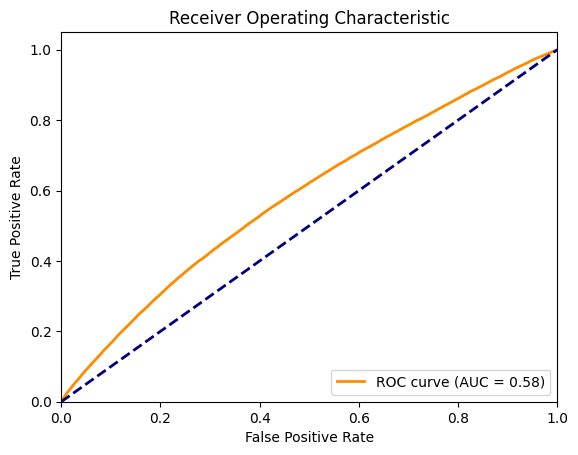

In [136]:
# 테스트 데이터에 대한 예측 확률
y_score = svm_initial.decision_function(X_test_initial)

# ROC curve와 AUC 계산
fpr, tpr, thresholds = roc_curve(y_test_initial, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)

# ROC curve 시각화
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### 2-3. 과적합 판단

In [59]:
# 훈련 데이터와 테스트 데이터의 예측 성능 계산
train_acc_initial = accuracy_score(y_train_initial, svm_initial.predict(X_train_initial))
test_acc_initial = accuracy_score(y_test_initial, svm_initial.predict(X_test_initial))

In [60]:
# 훈련 데이터와 테스트 데이터의 성능 차이 계산
diff_acc_initial = train_acc_initial - test_acc_initial

In [61]:
# 성능 차이 출력
print('Using X_initial')
print('Training accuracy:', train_acc_initial)
print('Test accuracy:', test_acc_initial)
print('Difference in accuracy:', diff_acc_initial)

Using X_initial
Training accuracy: 0.82506989002227
Test accuracy: 0.8249796988955437
Difference in accuracy: 9.019112672636886e-05


#### 2-4. importance 출력

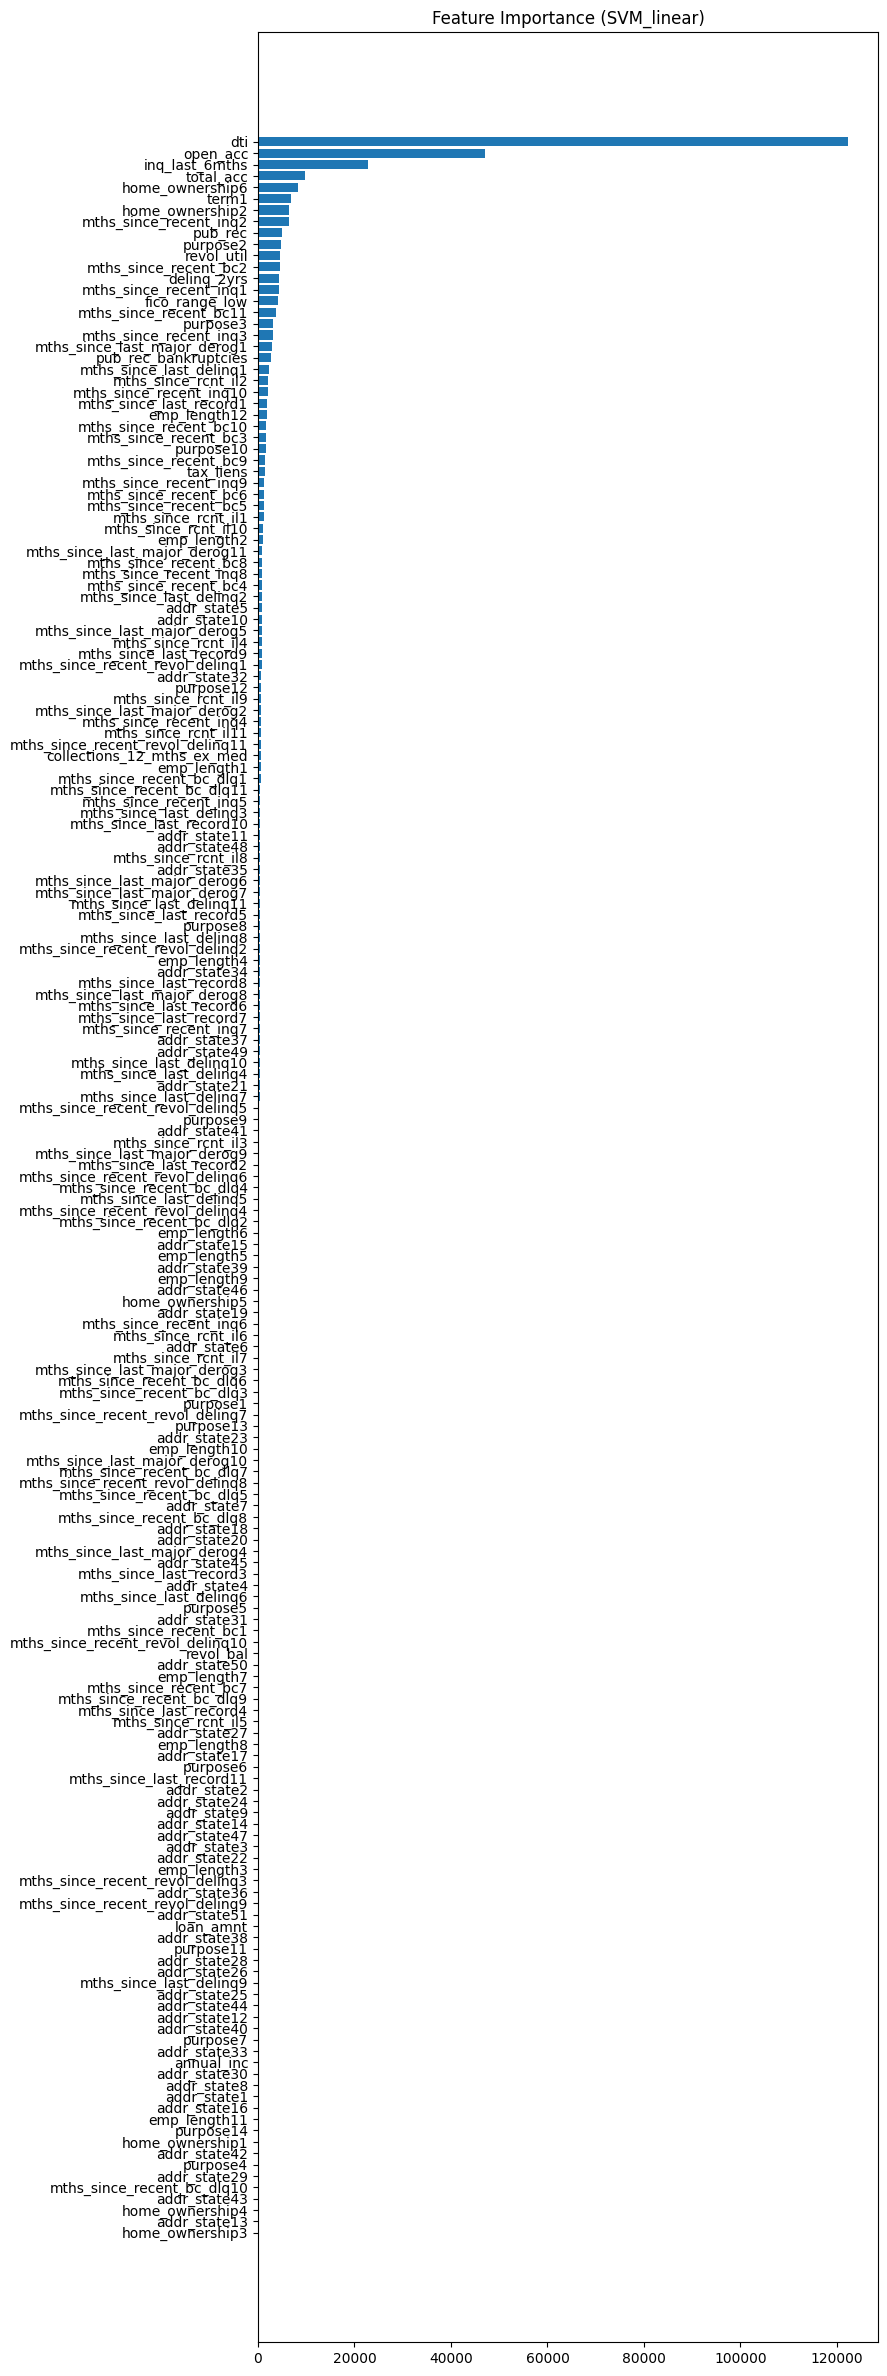

In [126]:
def plot_feature_importance(model, X):
    feature_importance = abs(model.coef_[0])
    sorted_idx = np.argsort(feature_importance)
    y_ticks = np.arange(0, len(sorted_idx))
    fig, ax = plt.subplots(figsize=(8, 30))
    ax.barh(y_ticks, feature_importance[sorted_idx])
    ax.set_yticklabels(X.columns[sorted_idx])
    ax.set_yticks(y_ticks)
    ax.set_title("Feature Importance (SVM_linear)")
    plt.show()

plot_feature_importance(svm_initial, X_train_initial)

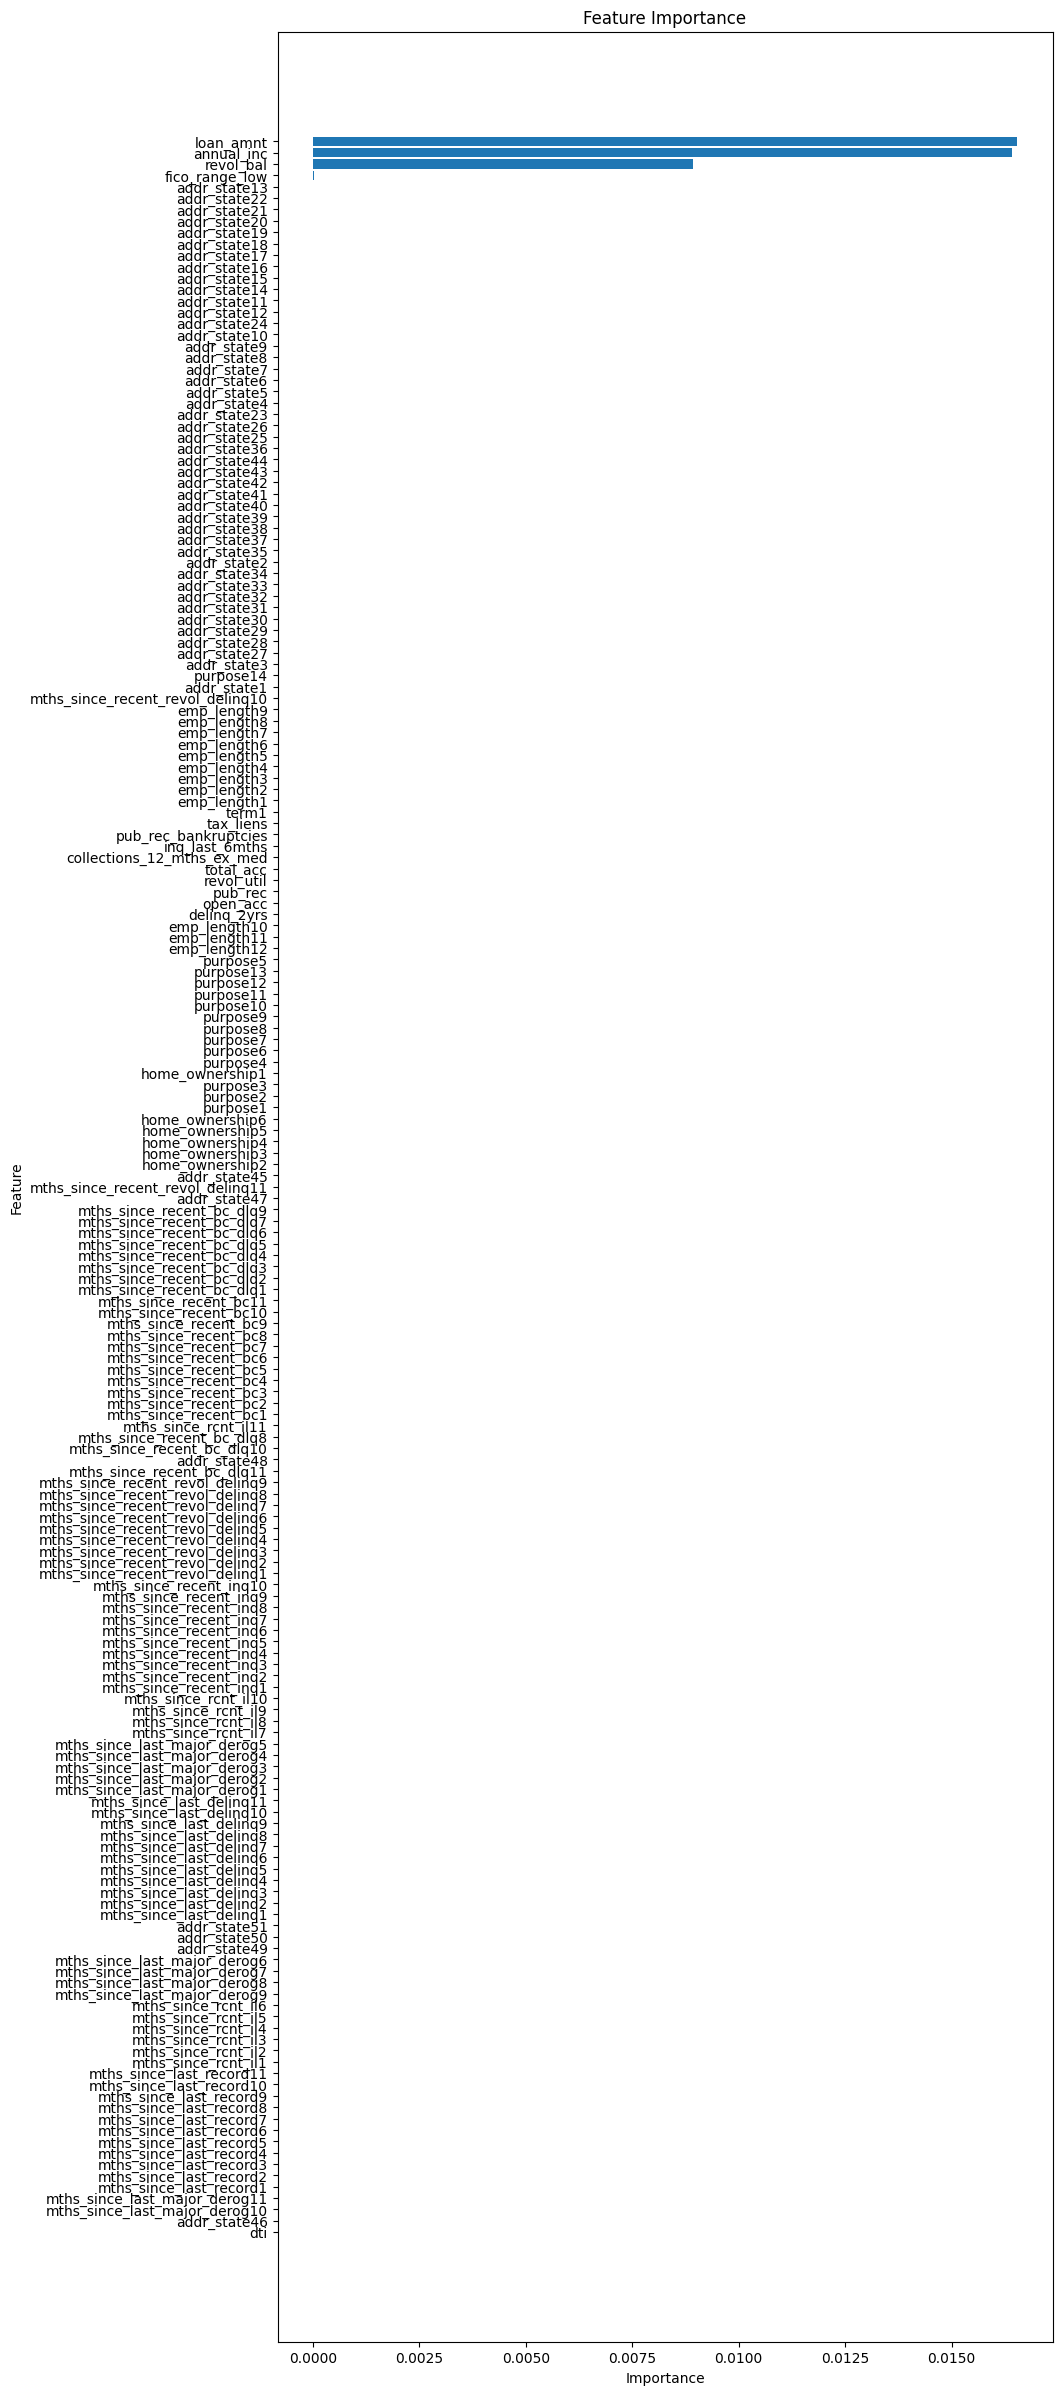

In [48]:
import matplotlib.pyplot as plt

# 중요도가 큰 순서대로 feature 이름과 함께 출력
importances_initial = np.array(importances_initial) # numpy 배열로 변환
indices_initial = np.argsort(importances_initial)[::-1]
sorted_features_initial = X_train_initial.columns[indices_initial]
sorted_importances_initial = importances_initial[np.argsort(importances_initial)][::-1]

plt.rc("figure", figsize=(10, 30))
plt.barh(sorted_features_initial[::-1], sorted_importances_initial[::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [135]:
# 혼동행렬
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
conf_mat = confusion_matrix(y_test_initial, y_pred_initial)
print("Confusion Matrix:\n", confusion_matrix(y_test_initial, y_pred_initial))
print("Accuracy:", accuracy_score(y_test_initial, y_pred_initial))
print("Precision:", precision_score(y_test_initial, y_pred_initial, average='macro'))
print("Recall:", recall_score(y_test_initial, y_pred_initial, average='macro'))
print("F1 Score:", f1_score(y_test_initial, y_pred_initial, average='macro'))

Confusion Matrix:
 [[116817 103050]
 [ 17260  25174]]
Accuracy: 0.5413284737763104
Precision: 0.533798151594514
Recall: 0.5622791292029572
F1 Score: 0.47755513279533834


## 2. scaled_digitized_X_initial
### 1) 모델 구축

In [36]:
# SVR 모델 생성 및 학습
## X_scaled_digitized 사용
svm_scaled_digitized = SVC(kernel='rbf', probability=True)
svm_scaled_digitized.fit(over_X_scaled_digitized, over_y_scaled_digitized)

# SVR 모델을 이용한 예측치 생성
y_pred_scaled_digitized = svm_scaled_digitized.predict(X_test_scaled_digitized)

### 2) 모델 평가

#### 2-1. Accuracy

In [37]:
# 예측
accuracy_scaled_digitized = accuracy_score(y_test_scaled_digitized, y_pred_scaled_digitized) 
print("Accuracy:", accuracy_scaled_digitized)

Accuracy: 0.4165100399922227


#### 2-2. ROC

In [45]:
# 환경
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [46]:
# ROC Curve 계산을 위한 y_proba 구하기(y_proba: positive class에 속할 확률 예측값)
y_proba_scaled_digitized = svm_scaled_digitized.predict_proba(X_test_scaled_digitized)[:, 1] # predict probability for positive class (1)
fpr_scaled_digitized, tpr_scaled_digitized, thresholds_scaled_digitized = roc_curve(y_test_scaled_digitized, y_proba_scaled_digitized) # calculate false positive rate, true positive rate and thresholds
roc_auc_scaled_digitized = auc(fpr_scaled_digitized, tpr_scaled_digitized) # calculate area under curve (AUC)

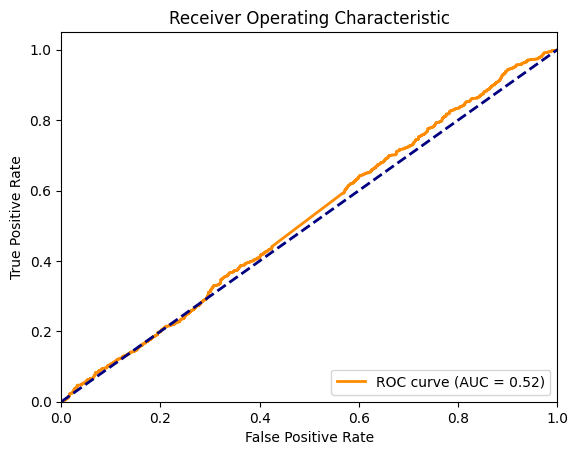

In [47]:
# scaled_digitized_X_initial 학습 모형의 ROC curve
plt.plot(fpr_scaled_digitized, tpr_scaled_digitized, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_scaled_digitized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### 2-3. 과적합 판단

In [48]:
# 훈련 데이터와 테스트 데이터의 예측 성능 계산
train_acc_scaled_digitized = accuracy_score(y_train_scaled_digitized, svm_scaled_digitized.predict(X_train_scaled_digitized))
test_acc_scaled_digitized = accuracy_score(y_test_scaled_digitized, svm_scaled_digitized.predict(X_test_scaled_digitized))

In [49]:
# 훈련 데이터와 테스트 데이터의 성능 차이 계산
diff_acc_scaled_digitized = train_acc_scaled_digitized - test_acc_scaled_digitized

In [50]:
# 성능 차이 출력
print('Using scaled_digitized_X_initial')
print('Training accuracy:', train_acc_scaled_digitized)
print('Test accuracy:', test_acc_scaled_digitized)
print('Difference in accuracy:', diff_acc_scaled_digitized)

Using scaled_digitized_X_initial
Training accuracy: 0.5211212388513182
Test accuracy: 0.5165790075463069
Difference in accuracy: 0.004542231305011302


#### 2-4. importance 출력

In [62]:
from joblib import Parallel, delayed

np.random.seed(100)
importances_scaled_digitized = np.zeros(X_train_scaled_digitized.shape[1])
acc_orig_scaled_digitized = svm_scaled_digitized.score(X_test_scaled_digitized, y_test_scaled_digitized)

def calc_importance(i):
    X_test_scaled_digitized_permuted = X_test_scaled_digitized.copy()
    np.random.shuffle(X_test_scaled_digitized_permuted.iloc[:, i].values)
    acc_permuted_scaled_digitized = svm_scaled_digitized.score(X_test_scaled_digitized_permuted, y_test_scaled_digitized)
    return acc_orig_scaled_digitized - acc_permuted_scaled_digitized

importances_scaled_digitized = Parallel(n_jobs=-1)(delayed(calc_importance)(i) for i in range(X_train_scaled_digitized.shape[1]))

# 중요도가 큰 순서대로 feature 이름과 함께 출력
indices_scaled_digitized = np.argsort(importances_scaled_digitized)[::-1]
for i in range(X_train_scaled_digitized.shape[1]):
    print(f"{i+1}. {X_train_scaled_digitized.columns[indices_scaled_digitized[i]]}: {importances_scaled_digitized[indices_scaled_digitized[i]]}")

1. loan_amnt: 0.0052595472215870576
2. addr_state11: 0.0
3. addr_state20: 0.0
4. addr_state19: 0.0
5. addr_state18: 0.0
6. addr_state17: 0.0
7. addr_state16: 0.0
8. addr_state15: 0.0
9. addr_state14: 0.0
10. addr_state13: 0.0
11. addr_state12: 0.0
12. addr_state10: 0.0
13. addr_state45: 0.0
14. addr_state9: 0.0
15. addr_state8: 0.0
16. addr_state7: 0.0
17. addr_state6: 0.0
18. addr_state5: 0.0
19. addr_state4: 0.0
20. addr_state3: 0.0
21. addr_state2: 0.0
22. addr_state1: 0.0
23. addr_state21: 0.0
24. addr_state22: 0.0
25. addr_state23: 0.0
26. addr_state24: 0.0
27. addr_state43: 0.0
28. addr_state42: 0.0
29. addr_state41: 0.0
30. addr_state40: 0.0
31. addr_state39: 0.0
32. addr_state38: 0.0
33. addr_state37: 0.0
34. addr_state36: 0.0
35. addr_state35: 0.0
36. addr_state34: 0.0
37. addr_state33: 0.0
38. addr_state32: 0.0
39. addr_state31: 0.0
40. addr_state30: 0.0
41. addr_state29: 0.0
42. addr_state28: 0.0
43. addr_state27: 0.0
44. addr_state26: 0.0
45. addr_state25: 0.0
46. purpose14

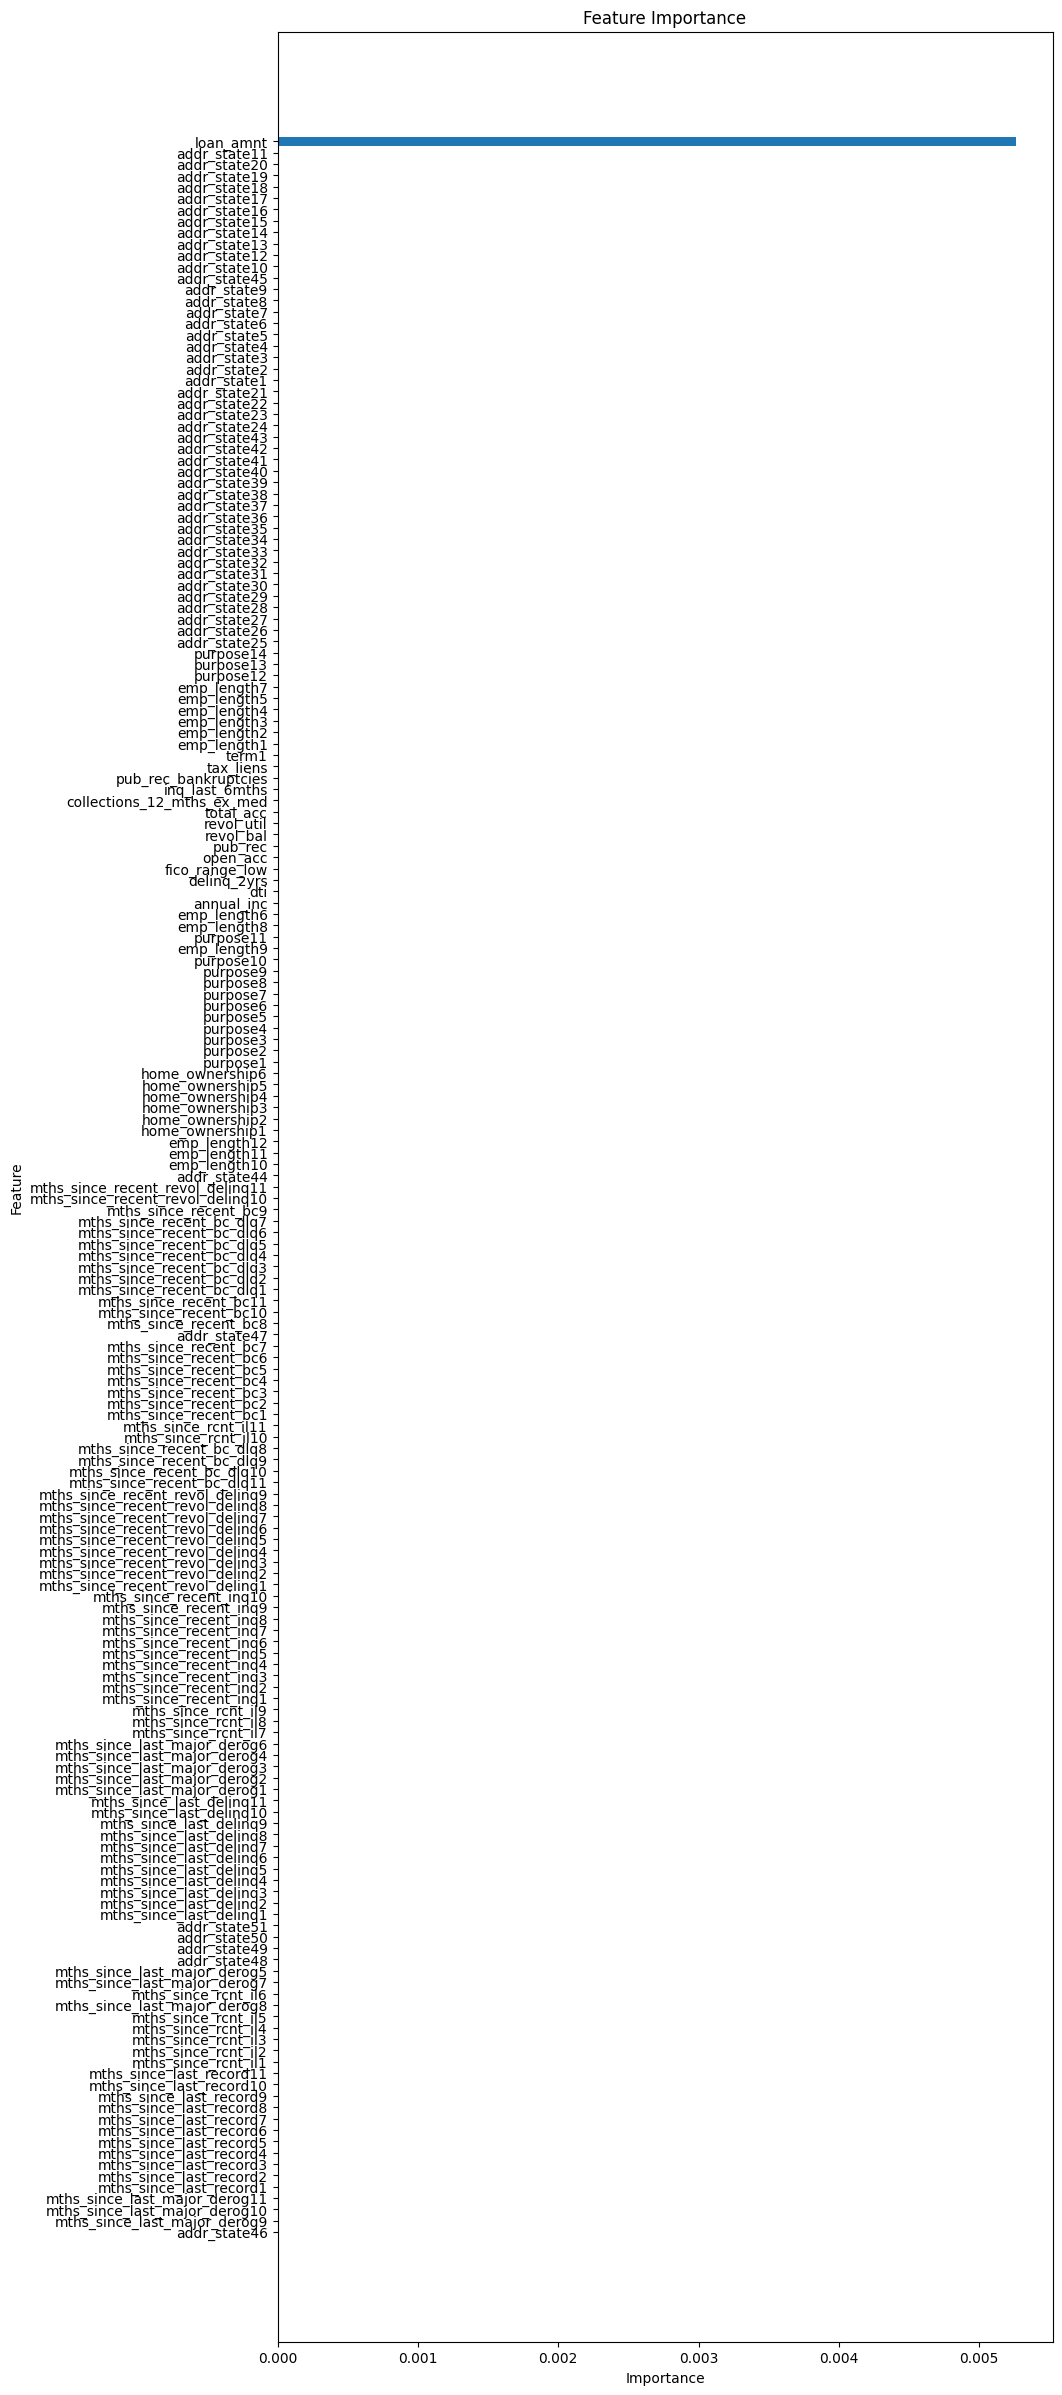

In [68]:
import matplotlib.pyplot as plt

# 중요도가 큰 순서대로 feature 이름과 함께 출력
importances_scaled_digitized = np.array(importances_scaled_digitized) # numpy 배열로 변환
indices_scaled_digitized = np.argsort(importances_scaled_digitized)[::-1]
sorted_features_scaled_digitized = X_train_scaled_digitized.columns[indices_scaled_digitized]
sorted_importances_scaled_digitized = importances_scaled_digitized[np.argsort(importances_scaled_digitized)][::-1]

plt.rc("figure", figsize=(10, 30))
plt.barh(sorted_features_scaled_digitized[::-1], sorted_importances_scaled_digitized[::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [51]:
get_clf_eval('SVM', y_test_scaled_digitized, params=None, pred=y_pred_scaled_digitized, pred_proba_po = y_proba_scaled_digitized)

-------------------------------
SVM
오차 행렬
[[ 920 1238]
 [ 876 1339]]
정확도: 0.5166, 정밀도: 0.5196, 재현율: 0.6045, F1: 0.5588, AUC: 0.5186


## 3-1. X_initial_ordinal(랜덤추출사용O)
### 1) 모델 구축

In [40]:
# SVM 모델 생성 및 학습
## X_initial_ordinal 사용
svm_ordinal_random = SVC(kernel='rbf', probability=True)
svm_ordinal_random.fit(over_X_ordinal_random, over_y_ordinal_random)

# SVM 모델을 이용한 예측치 생성
y_pred_ordinal_random = svm_ordinal_random.predict(X_test_ordinal)

### 2) 모델 평가

#### 2-1. Accuracy

In [41]:
# 예측
accuracy_ordinal_random = accuracy_score(y_test_ordinal, y_pred_ordinal_random) # Calculate the accuracy of the model
print("Accuracy:", accuracy_ordinal_random)

Accuracy: 0.5579124745997919


#### 2-2. ROC

In [ ]:
# 환경
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [ ]:
# ROC Curve 계산을 위한 y_proba 구하기(y_proba: positive class에 속할 확률 예측값)
y_proba_ordinal_random = svm_ordinal_random.predict_proba(X_test_ordinal_random)[:, 1] # predict probability for positive class (1)
fpr_ordinal_random, tpr_ordinal_random, thresholds_ordinal_random = roc_curve(y_test_ordinal_random, y_proba_ordinal_random) # calculate false positive rate, true positive rate and thresholds
roc_auc_ordinal_random = auc(fpr_ordinal_random, tpr_ordinal_random) # calculate area under curve (AUC)

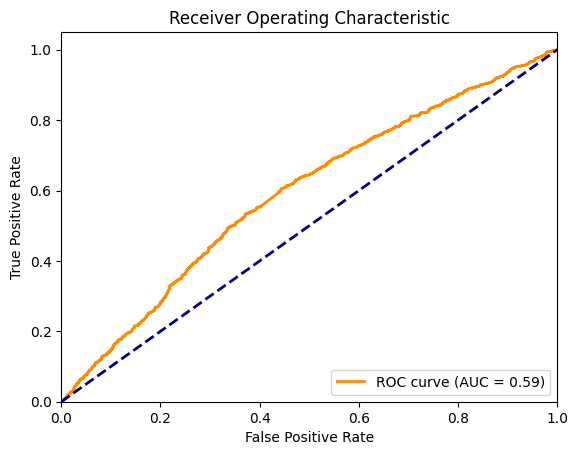

In [ ]:
# X_initial 학습 모형의 ROC curve
plt.plot(fpr_ordinal_random, tpr_ordinal_random, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_ordinal_random)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### 2-3. 과적합 판단

In [ ]:
# 훈련 데이터와 테스트 데이터의 예측 성능 계산
train_acc_ordinal_random = accuracy_score(y_train_ordinal_random, svm_ordinal_random.predict(X_train_ordinal_random))
test_acc_ordinal_random = accuracy_score(y_test_ordinal, svm_ordinal_random.predict(X_test_ordinal))

In [ ]:
# 훈련 데이터와 테스트 데이터의 성능 차이 계산
diff_acc_ordinal_random= train_acc_ordinal_random - test_acc_ordinal_random

In [ ]:
# 성능 차이 출력
print('Using X_initial')
print('Training accuracy:', train_acc_ordinal_random)
print('Test accuracy:', test_acc_ordinal_random)
print('Difference in accuracy:', diff_acc_ordinal_random)

Using X_initial
Training accuracy: 0.57953543075566
Test accuracy: 0.5758060827806998
Difference in accuracy: 0.003729347974960273


#### 2-4. importance 출력

In [ ]:
from joblib import Parallel, delayed

np.random.seed(100)
importances_ordinal_random = np.zeros(X_train_ordinal.shape[1])
acc_orig_ordinal_random = svm_ordinal_random.score(X_test_ordinal, y_test_ordinal)

def calc_importance(i):
    X_test_ordinal_random_permuted = X_test_ordinal.copy()
    np.random.shuffle(X_test_ordinal_random_permuted.iloc[:, i].values)
    acc_permuted_ordinal_random = svm_ordinal_random.score(X_test_ordinal_random_permuted, y_test_ordinal)
    return acc_orig_ordinal_random - acc_permuted_ordinal_random

importances_ordinal_random = Parallel(n_jobs=-1)(delayed(calc_importance)(i) for i in range(X_train_ordinal_random.shape[1]))

# 중요도가 큰 순서대로 feature 이름과 함께 출력
indices_ordinal_random = np.argsort(importances_ordinal_random)[::-1]
for i in range(X_train_ordinal_random.shape[1]):
    print(f"{i+1}. {X_train_ordinal_random.columns[indices_ordinal_random[i]]}: {importances_ordinal_random[indices_ordinal_random[i]]}")


1. annual_inc: 0.060599131031328635
2. loan_amnt: 0.0274411159387149
3. revol_bal: 0.006631603018522836
4. addr_state11: 0.0
5. addr_state20: 0.0
6. addr_state19: 0.0
7. addr_state18: 0.0
8. addr_state17: 0.0
9. addr_state16: 0.0
10. addr_state15: 0.0
11. addr_state14: 0.0
12. addr_state13: 0.0
13. addr_state12: 0.0
14. addr_state10: 0.0
15. addr_state22: 0.0
16. addr_state9: 0.0
17. addr_state8: 0.0
18. addr_state7: 0.0
19. addr_state6: 0.0
20. addr_state5: 0.0
21. addr_state4: 0.0
22. addr_state3: 0.0
23. addr_state2: 0.0
24. addr_state21: 0.0
25. addr_state24: 0.0
26. addr_state23: 0.0
27. purpose14: 0.0
28. addr_state43: 0.0
29. addr_state42: 0.0
30. addr_state41: 0.0
31. addr_state40: 0.0
32. addr_state39: 0.0
33. addr_state38: 0.0
34. addr_state37: 0.0
35. addr_state36: 0.0
36. addr_state35: 0.0
37. addr_state34: 0.0
38. addr_state33: 0.0
39. addr_state32: 0.0
40. addr_state31: 0.0
41. addr_state30: 0.0
42. addr_state29: 0.0
43. addr_state28: 0.0
44. addr_state27: 0.0
45. addr_st

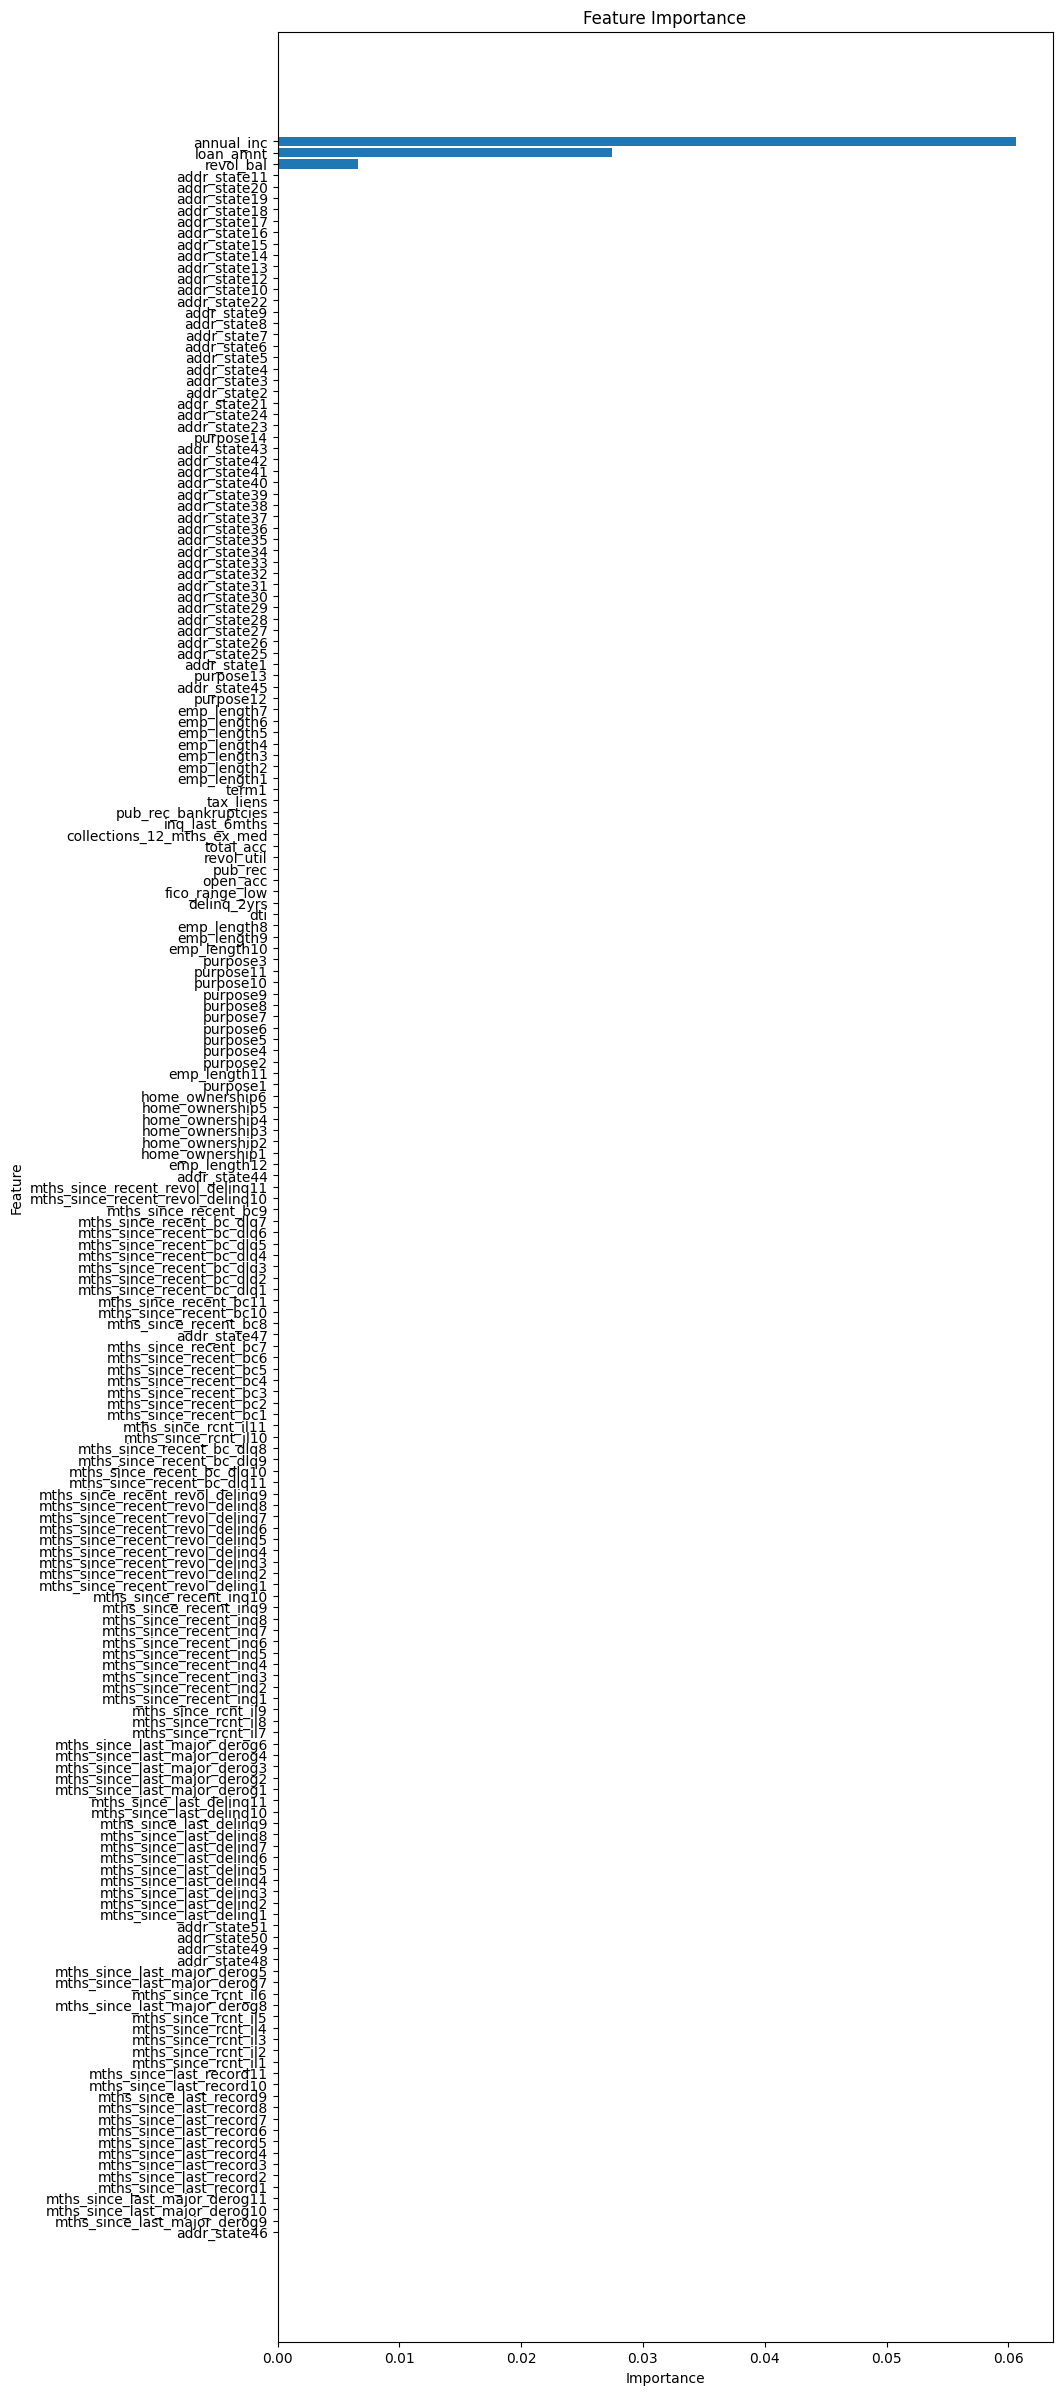

In [ ]:
import matplotlib.pyplot as plt

# 중요도가 큰 순서대로 feature 이름과 함께 출력
importances_ordinal_random = np.array(importances_ordinal_random) # numpy 배열로 변환
indices_ordinal_random = np.argsort(importances_ordinal_random)[::-1]
sorted_features_ordinal_random = X_train_ordinal_random.columns[indices_ordinal_random]
sorted_importances_ordinal_random = importances_ordinal_random[np.argsort(importances_ordinal_random)][::-1]

plt.rc("figure", figsize=(10, 30))
plt.barh(sorted_features_ordinal_random[::-1], sorted_importances_ordinal_random[::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [ ]:
# 혼동행렬
get_clf_eval('SVM', y_test_ordinal, params=None, pred=y_pred_ordinal_random, pred_proba_po = y_proba_ordinal_random)

-------------------------------
SVM
오차 행렬
[[1230  928]
 [ 927 1288]]
정확도: 0.5758, 정밀도: 0.5812, 재현율: 0.5815, F1: 0.5814, AUC: 0.5920


## 3-2. X_initial_ordinal(랜덤추출사용X)
### 1) 모델 구축

In [ ]:
# SVM 모델 생성 및 학습
## X_initial_ordinal 사용
svm_ordinal = SVC(kernel='rbf', probability=True)
svm_ordinal.fit(over_X_ordinal, over_y_ordinal)

# SVM 모델을 이용한 예측치 생성
y_pred_ordinal = svm_ordinal.predict(X_test_ordinal)

### 2) 모델 평가

#### 2-1. Accuracy

In [ ]:
# 예측
accuracy_ordinal = accuracy_score(y_test_ordinal, y_pred_ordinal) # Calculate the accuracy of the model
print("Accuracy:", accuracy_ordinal)

Accuracy: 0.565510615666734


#### 2-2. ROC

In [ ]:
# 환경
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [ ]:
# ROC Curve 계산을 위한 y_proba 구하기(y_proba: positive class에 속할 확률 예측값)
y_proba_ordinal = svm_ordinal.predict_proba(X_test_ordinal)[:, 1] # predict probability for positive class (1)
fpr_ordinal, tpr_ordinal, thresholds_ordinal = roc_curve(y_test_ordinal, y_proba_ordinal) # calculate false positive rate, true positive rate and thresholds
roc_auc_ordinal = auc(fpr_ordinal, tpr_ordinal) # calculate area under curve (AUC)

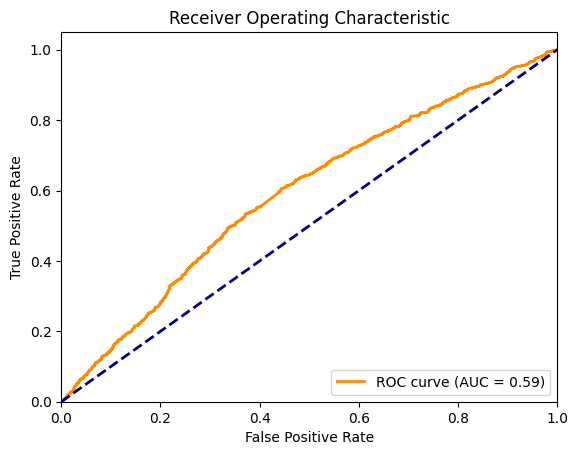

In [ ]:
# X_initial 학습 모형의 ROC curve
plt.plot(fpr_ordinal, tpr_ordinal, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_ordinal)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### 2-3. 과적합 판단

In [ ]:
# 훈련 데이터와 테스트 데이터의 예측 성능 계산
train_acc_ordinal = accuracy_score(y_train_ordinal, svm_ordinal.predict(X_train_ordinal))
test_acc_ordinal = accuracy_score(y_test_ordinal, svm_ordinal.predict(X_test_ordinal))

In [ ]:
# 훈련 데이터와 테스트 데이터의 성능 차이 계산
diff_acc_ordinal= train_acc_ordinal - test_acc_ordinal

In [ ]:
# 성능 차이 출력
print('Using X_initial')
print('Training accuracy:', train_acc_ordinal)
print('Test accuracy:', test_acc_ordinal)
print('Difference in accuracy:', diff_acc_ordinal)

Using X_initial
Training accuracy: 0.57953543075566
Test accuracy: 0.5758060827806998
Difference in accuracy: 0.003729347974960273


#### 2-4. importance 출력

In [ ]:
from joblib import Parallel, delayed

np.random.seed(100)
importances_ordinal = np.zeros(X_train_ordinal.shape[1])
acc_orig_ordinal = svm_ordinal.score(X_test_ordinal, y_test_ordinal)

def calc_importance(i):
    X_test_ordinal_permuted = X_test_ordinal.copy()
    np.random.shuffle(X_test_ordinal_permuted.iloc[:, i].values)
    acc_permuted_ordinal = svm_ordinal.score(X_test_ordinal_permuted, y_test_ordinal)
    return acc_orig_ordinal - acc_permuted_ordinal

importances_ordinal = Parallel(n_jobs=-1)(delayed(calc_importance)(i) for i in range(X_train_ordinal.shape[1]))

# 중요도가 큰 순서대로 feature 이름과 함께 출력
indices_ordinal = np.argsort(importances_ordinal)[::-1]
for i in range(X_train_ordinal.shape[1]):
    print(f"{i+1}. {X_train_ordinal.columns[indices_ordinal[i]]}: {importances_ordinal[indices_ordinal[i]]}")


1. annual_inc: 0.060599131031328635
2. loan_amnt: 0.0274411159387149
3. revol_bal: 0.006631603018522836
4. addr_state11: 0.0
5. addr_state20: 0.0
6. addr_state19: 0.0
7. addr_state18: 0.0
8. addr_state17: 0.0
9. addr_state16: 0.0
10. addr_state15: 0.0
11. addr_state14: 0.0
12. addr_state13: 0.0
13. addr_state12: 0.0
14. addr_state10: 0.0
15. addr_state22: 0.0
16. addr_state9: 0.0
17. addr_state8: 0.0
18. addr_state7: 0.0
19. addr_state6: 0.0
20. addr_state5: 0.0
21. addr_state4: 0.0
22. addr_state3: 0.0
23. addr_state2: 0.0
24. addr_state21: 0.0
25. addr_state24: 0.0
26. addr_state23: 0.0
27. purpose14: 0.0
28. addr_state43: 0.0
29. addr_state42: 0.0
30. addr_state41: 0.0
31. addr_state40: 0.0
32. addr_state39: 0.0
33. addr_state38: 0.0
34. addr_state37: 0.0
35. addr_state36: 0.0
36. addr_state35: 0.0
37. addr_state34: 0.0
38. addr_state33: 0.0
39. addr_state32: 0.0
40. addr_state31: 0.0
41. addr_state30: 0.0
42. addr_state29: 0.0
43. addr_state28: 0.0
44. addr_state27: 0.0
45. addr_st

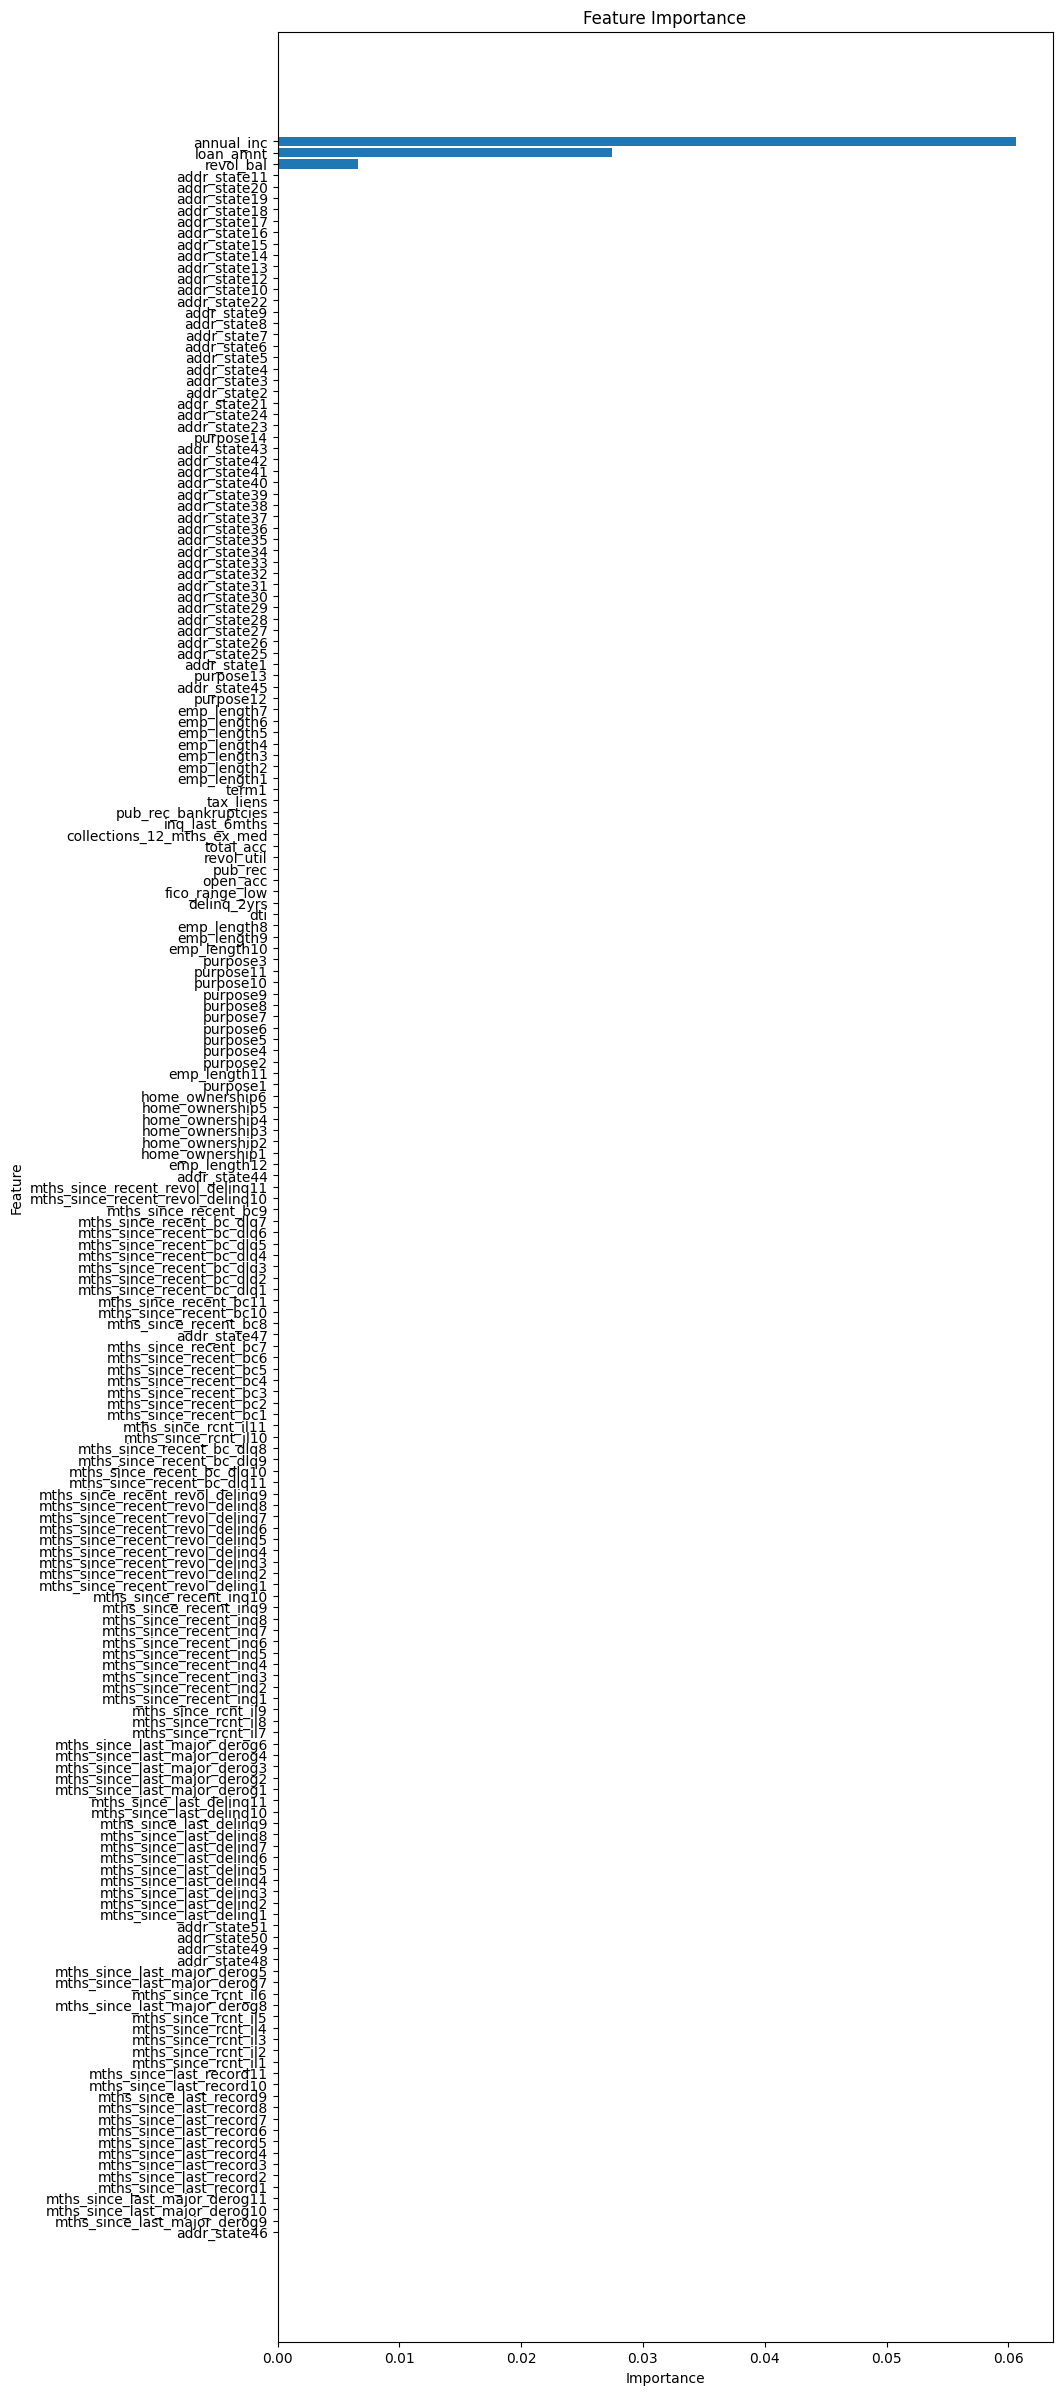

In [ ]:
import matplotlib.pyplot as plt

# 중요도가 큰 순서대로 feature 이름과 함께 출력
importances_ordinal = np.array(importances_ordinal) # numpy 배열로 변환
indices_ordinal = np.argsort(importances_ordinal)[::-1]
sorted_features_ordinal = X_train_ordinal.columns[indices_ordinal]
sorted_importances_ordinal = importances_ordinal[np.argsort(importances_ordinal)][::-1]

plt.rc("figure", figsize=(10, 30))
plt.barh(sorted_features_ordinal[::-1], sorted_importances_ordinal[::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [ ]:
# 혼동행렬
get_clf_eval('SVM', y_test_ordinal, params=None, pred=y_pred_ordinal, pred_proba_po = y_proba_ordinal)

-------------------------------
SVM
오차 행렬
[[1230  928]
 [ 927 1288]]
정확도: 0.5758, 정밀도: 0.5812, 재현율: 0.5815, F1: 0.5814, AUC: 0.5920


In [137]:
import joblib

In [138]:
joblib.dump(svm_initial, './SVM(linear)_initial.joblib')

['./SVM(linear)_initial.joblib']

In [ ]:
joblib.dump(svm_scaled_digitized, './RF_scaled_digitized.pkl')